In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Where are the customers from

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


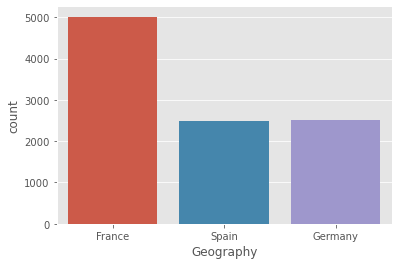

In [5]:
plt.figure(figsize=(6,4))
plt.style.use('ggplot')
sns.countplot(df['Geography'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


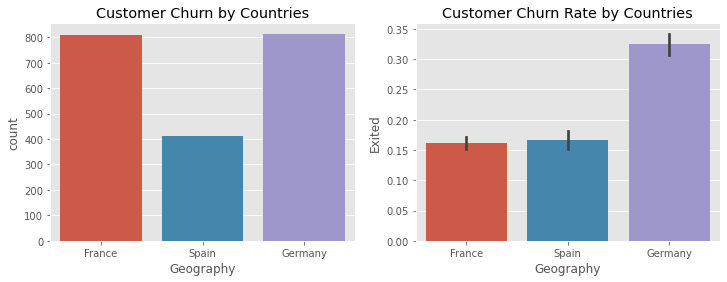

In [6]:
plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
ax=sns.countplot(df[df['Exited']==1]['Geography'])
#ax.set_box_aspect(0.5)
ax.set_title('Customer Churn by Countries')
plt.subplot(1,2,2)
ax1=sns.barplot(x= df['Geography'], y= df['Exited'])
ax1.set_title('Customer Churn Rate by Countries')
plt.show()

Text(0.5, 1.0, 'Customer Churn Rate \n by products owned')

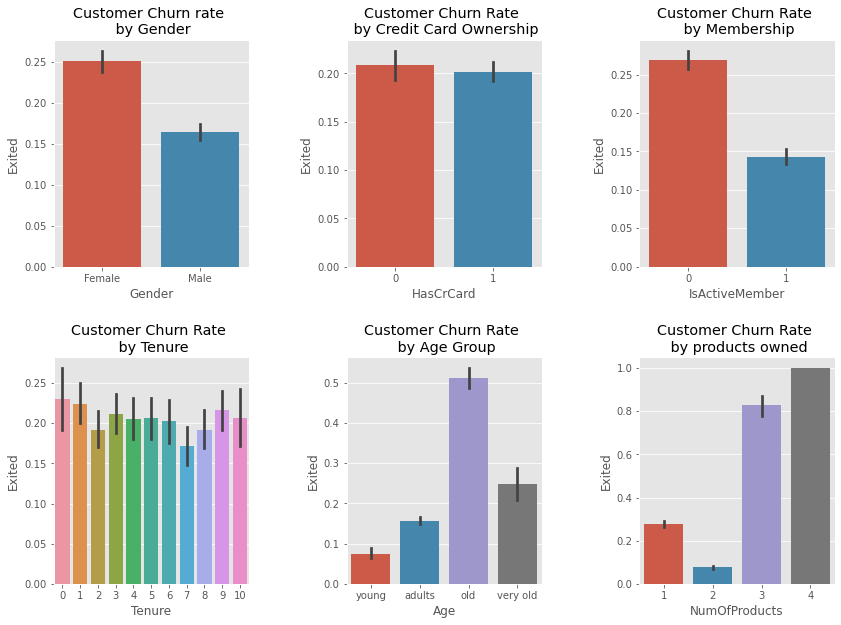

In [7]:
plt.figure(figsize=(14,10))
bins= [18,30,45,60,93]
plt.subplots_adjust(wspace=0.5,hspace=0.4)
plt.subplot(2,3,5)
labels= ['young', 'adults', 'old', 'very old']
binned= pd.cut(df['Age'], bins=bins, labels=labels)
ax=sns.barplot(x= binned, y= df['Exited'])
ax.set_title('Customer Churn Rate \n by Age Group')
plt.subplot(2,3,1)
ax=sns.barplot(x = df['Gender'], y=df['Exited'])
#ax.set_box_aspect(0.5)
ax.set_title('Customer Churn rate \n by Gender')
plt.subplot(2,3,2)
ax1=sns.barplot(x= df['HasCrCard'], y= df['Exited'])
ax1.set_title('Customer Churn Rate \n by Credit Card Ownership')
plt.subplot(2,3,3)
ax1=sns.barplot(x= df['IsActiveMember'], y= df['Exited'])
ax1.set_title('Customer Churn Rate \n by Membership')
plt.subplot(2,3,4)
ax1=sns.barplot(x= df['Tenure'], y= df['Exited'])
ax1.set_title('Customer Churn Rate \n by Tenure')
plt.subplot(2,3,6)
ax1=sns.barplot(x= df['NumOfProducts'], y= df['Exited'])
ax1.set_title('Customer Churn Rate \n by products owned')

Text(0.5, 1.0, 'Customer Churn Rate by Account Balance')

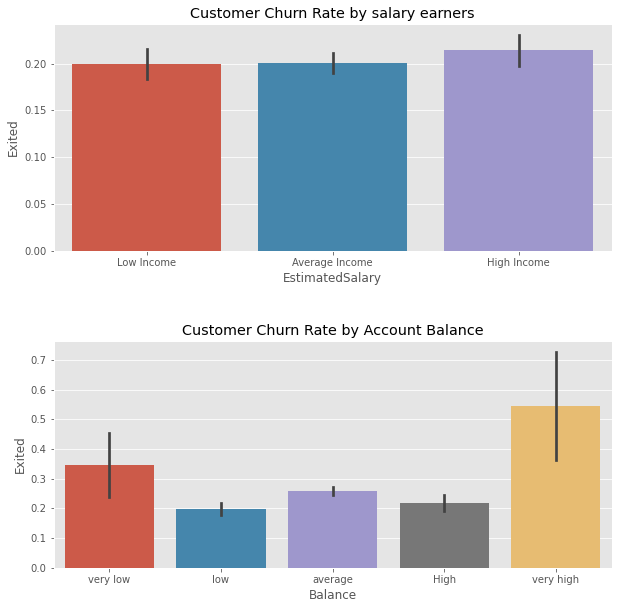

In [8]:
plt.figure(figsize=(10,10))
bins= [0,50000,150000,200000]
plt.subplots_adjust(wspace=0.5,hspace=0.4)
plt.subplot(2,1,1)
labels= ['Low Income', 'Average Income',  'High Income']
binned= pd.cut(df['EstimatedSalary'], bins=bins, labels=labels)
ax=sns.barplot(x= binned, y= df['Exited'])
ax.set_title('Customer Churn Rate by salary earners')
bins1= [0,50000,100000,150000,200000,250000]
plt.subplot(2,1,2)
labels1 = ['very low', 'low', 'average', 'High', 'very high']
binned1 = pd.cut(df['Balance'], bins=bins1, labels=labels1)
ax=sns.barplot(x= binned1, y= df['Exited'])
ax.set_title('Customer Churn Rate by Account Balance')

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
import time

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
X= df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
le = LabelEncoder()
X['Geography']= le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

In [17]:
scaler= StandardScaler()
X= scaler.fit_transform(X)
X[0:5]

array([[-0.32622142, -0.90188624, -1.09598752,  0.29351742, -1.04175968,
        -1.22584767, -0.91158349,  0.64609167,  0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752,  0.19816383, -1.38753759,
         0.11735002, -0.91158349, -1.54776799,  0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752,  0.29351742,  1.03290776,
         1.33305335,  2.52705662,  0.64609167, -1.03067011,  0.2406869 ],
       [ 0.50152063, -0.90188624, -1.09598752,  0.00745665, -1.38753759,
        -1.22584767,  0.80773656, -1.54776799, -1.03067011, -0.10891792],
       [ 2.06388377,  1.51506738, -1.09598752,  0.38887101, -1.04175968,
         0.7857279 , -0.91158349,  0.64609167,  0.97024255, -0.36527578]])

In [18]:
y= df['Exited'].values
y[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [19]:
models = [DecisionTreeClassifier(), KNeighborsClassifier(), svm.SVC(), LogisticRegression(), GaussianNB(), RandomForestClassifier(), XGBClassifier(), LGBMClassifier(), CatBoostClassifier(silent=True), AdaBoostClassifier()]
model_name = ['Decision Tree', 'K Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression',  'Naive Bayes', 'Random Forest', 'XGBOOST', 'Light Boost', 'Cat Boost', 'Ada Boost']
for i,j in zip(models, model_name):
    model = i
    start= time.time()
    cvs = cross_val_score(model, X,y)
    end= time.time()
    print(j)
    print('The scores are:', cvs)
    print('the average score is:', round(cvs.mean(),3))
    print('Time taken:', round((end - start),3), 'secs taken')
    print('')

Decision Tree
The scores are: [0.7815 0.8055 0.7905 0.7835 0.784 ]
the average score is: 0.789
Time taken: 1.717 secs taken

K Nearest Neighbors
The scores are: [0.824  0.8435 0.823  0.8335 0.834 ]
the average score is: 0.832
Time taken: 3.092 secs taken

Support Vector Machine
The scores are: [0.8535 0.8605 0.852  0.865  0.8485]
the average score is: 0.856
Time taken: 32.377 secs taken

Logistic Regression
The scores are: [0.808  0.807  0.8055 0.8185 0.8005]
the average score is: 0.808
Time taken: 1.709 secs taken

Naive Bayes
The scores are: [0.828  0.824  0.827  0.8375 0.825 ]
the average score is: 0.828
Time taken: 0.084 secs taken

Random Forest
The scores are: [0.8545 0.869  0.859  0.864  0.858 ]
the average score is: 0.861
Time taken: 11.567 secs taken

XGBOOST
The scores are: [0.857  0.8575 0.858  0.857  0.8495]
the average score is: 0.856
Time taken: 8.505 secs taken

Light Boost
The scores are: [0.8605 0.871  0.8585 0.8705 0.859 ]
the average score is: 0.864
Time taken: 2.53 

In [20]:
models = [DecisionTreeClassifier(), KNeighborsClassifier(), svm.SVC(), LogisticRegression(), GaussianNB(), RandomForestClassifier(), XGBClassifier(), LGBMClassifier(), CatBoostClassifier(silent= True), AdaBoostClassifier()]
model_name = ['Decision Tree', 'K Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression',  'Naive Bayes', 'Random Forest', 'XGBOOST', 'Light Boost', 'Cat Boost', 'Ada Boost']
for i,j in zip(models, model_name):
    model = i
    cvs = cross_val_score(model, X,y, scoring= 'roc_auc')
    print(j)
    print('The scores are:', cvs)
    print('the average score is:', cvs.mean())
    print('')

Decision Tree
The scores are: [0.66748571 0.70921396 0.68817045 0.68391118 0.67973289]
the average score is: 0.6857028402471219

K Nearest Neighbors
The scores are: [0.7662516  0.80007806 0.78639502 0.76906105 0.76547426]
the average score is: 0.7774519972535302

Support Vector Machine
The scores are: [0.80420947 0.83021572 0.83223593 0.82919591 0.81990619]
the average score is: 0.8231526460667868

Logistic Regression
The scores are: [0.77702083 0.7488207  0.7590734  0.75966259 0.72858066]
the average score is: 0.7546316355783527

Naive Bayes
The scores are: [0.81641048 0.79808663 0.80835844 0.81109461 0.79203549]
the average score is: 0.8051971296150505

Random Forest
The scores are: [0.84687993 0.8585421  0.84955988 0.85291378 0.84773294]
the average score is: 0.8511257250782863

XGBOOST
The scores are: [0.84455057 0.85387415 0.84757331 0.84814861 0.83359785]
the average score is: 0.845548897651071

Light Boost
The scores are: [0.86190604 0.86483274 0.85566923 0.86189657 0.85224978]


In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [22]:
df.shape

(10000, 14)

In [41]:
def classification_model():
    model = Sequential()
    model.add(Dense(50, activation= 'relu', input_shape=(10,)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])
    return model

In [42]:
model= classification_model()
model.fit(X,y, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
219/219 - 2s - loss: 0.6659 - accuracy: 0.7729 - val_loss: 0.5284 - val_accuracy: 0.7980 - 2s/epoch - 9ms/step
Epoch 2/100
219/219 - 1s - loss: 0.5094 - accuracy: 0.8097 - val_loss: 0.4795 - val_accuracy: 0.8157 - 665ms/epoch - 3ms/step
Epoch 3/100
219/219 - 1s - loss: 0.4696 - accuracy: 0.8156 - val_loss: 0.5036 - val_accuracy: 0.8107 - 668ms/epoch - 3ms/step
Epoch 4/100
219/219 - 1s - loss: 0.4461 - accuracy: 0.8277 - val_loss: 0.5050 - val_accuracy: 0.8370 - 674ms/epoch - 3ms/step
Epoch 5/100
219/219 - 1s - loss: 0.4222 - accuracy: 0.8381 - val_loss: 0.4730 - val_accuracy: 0.8447 - 648ms/epoch - 3ms/step
Epoch 6/100
219/219 - 1s - loss: 0.4167 - accuracy: 0.8386 - val_loss: 0.4434 - val_accuracy: 0.8450 - 669ms/epoch - 3ms/step
Epoch 7/100
219/219 - 1s - loss: 0.4140 - accuracy: 0.8407 - val_loss: 0.4392 - val_accuracy: 0.8250 - 667ms/epoch - 3ms/step
Epoch 8/100
219/219 - 1s - loss: 0.3993 - accuracy: 0.8454 - val_loss: 0.4190 - val_accuracy: 0.8517 - 659ms/epoch - 3ms/

In [43]:
score= model.evaluate(X,y)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.3968 - accuracy: 0.8694


[0.3967950940132141, 0.8694000244140625]